# Imports et utilitaires

In [ ]:
# Import necessary libraries for image processing and visualization
import cv2  # OpenCV for image operations
import numpy as np  # Numerical operations
import scipy  # Scientific computing
import matplotlib.pyplot as plt  # Plotting
plt.rcParams['image.cmap'] = 'gray'  # Set default colormap to grayscale
import matplotlib
import scipy.signal as signal  # Signal processing functions
matplotlib.rcParams['figure.figsize'] = (25.0, 10.0)  # Set default figure size
from scipy.cluster.vq import kmeans  # K-means clustering

# Function to display images with optional title and color map
def imshow(img, title=None, ax=None, is_bgr=False, cmap='gray'):
    """
    Display an image with optional title and color map.
    img: image to display (hxw or hxwx3)
    title: Figure's title
    ax: Axis to display on (optional)
    is_bgr: Convert BGR to RGB if True
    cmap: Color map
    """
    show=False
    plt.axis('off')
    if ax is None:
        show=True
        if title is not None:
            plt.title(title)
        ax = plt
    else:
        if title is not None:
            ax.set_title(title)
            ax.set_axis_off()
    if img.ndim==2:
        ax.imshow(img, cmap='gray')
    else:
        if is_bgr:
            img = img[:,:,::-1].copy()
        ax.imshow(img)
    if show:
        plt.show()

# Convert float image to uint8
def f2int(img):
    return (img*255).astype(np.uint8)

# Convert uint8 image to float
def int2f(img):
    return img.astype(np.float32)/255.

# Part 1
Drawing implies lines. The first part of the lab is dedicated to edge detection in the image. To display the image, you are free to use the function **imshow** given in the previous cell.

## Question 1



Load the the **chaton.png** ("chaton"=kitten), convert it into float and display it.



Make sure that the colors are correctly rendered (as in your viewer) and that the pixels' values are inside the range [0,1].

> **Warning** If you use **openCV** (cv2), the default channels' order is <span style="color:blue">b</span>, <span style="color:green">g</span>, <span style="color:red">r</span> instead of the conventional <span style="color:red">r</span>, <span style="color:green">g</span>, <span style="color:blue">b</span>.

> In most of this lab, we will work  with image of type **np.float32**. But some functions expect images in the range [0, 255] with uint8 dtype. To make it easier for you, we provide two functions **f2int** and **int2f** that'll let you switch between both types (see above cell).


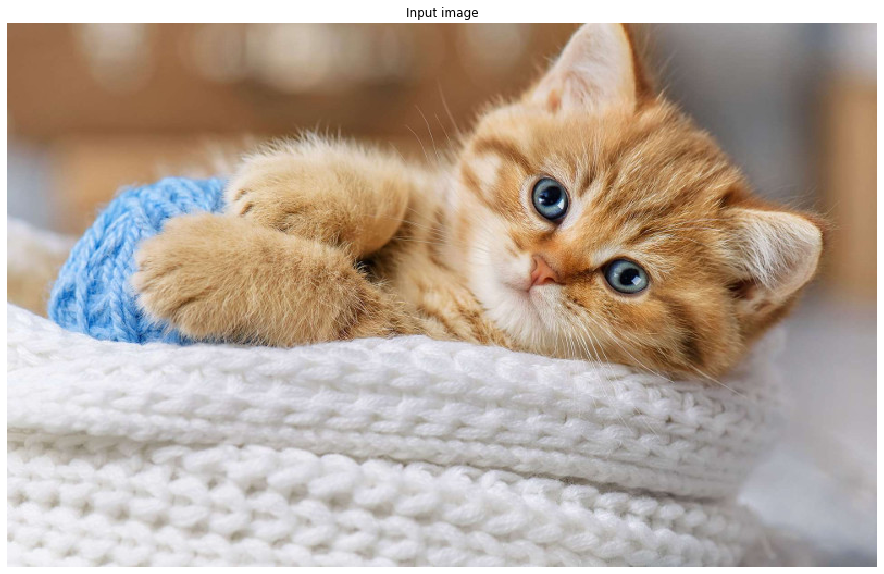

In [127]:
img = int2f(cv2.imread('chaton.png'))
imshow(img,title = 'Input image', is_bgr=True)

## Question 2
The lightness of an image is defined by:
$$
c = \frac{1}{2}(\max(r, g, b) + \min(r, g, b))
$$

Compute and display the lightness of the image.

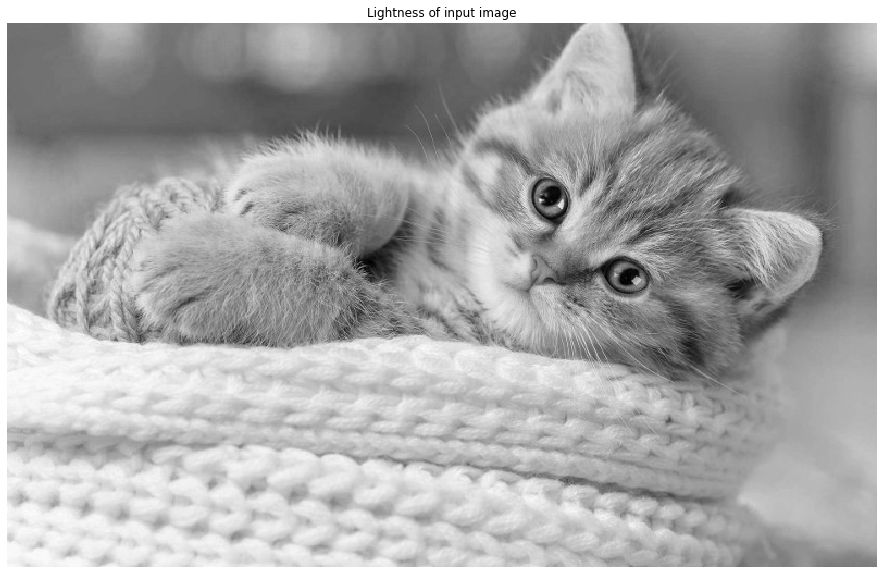

In [128]:
img_light = 0.5*(img.max(2)+img.min(2))
imshow(img_light,title='Lightness of input image')

## Question 3
We will now focus on edge detection. Most of the methods you've seen during the course are very sensitive to noise. In our case, the kitten's fur can be assimilated to a pepper and salt noise. What type of filter should you use to attenuate it? Filter the lightness map witht this filter using a window size of 7. 

<font color='blue'>
    To attenuate kitten's fur specification, median filter is used.

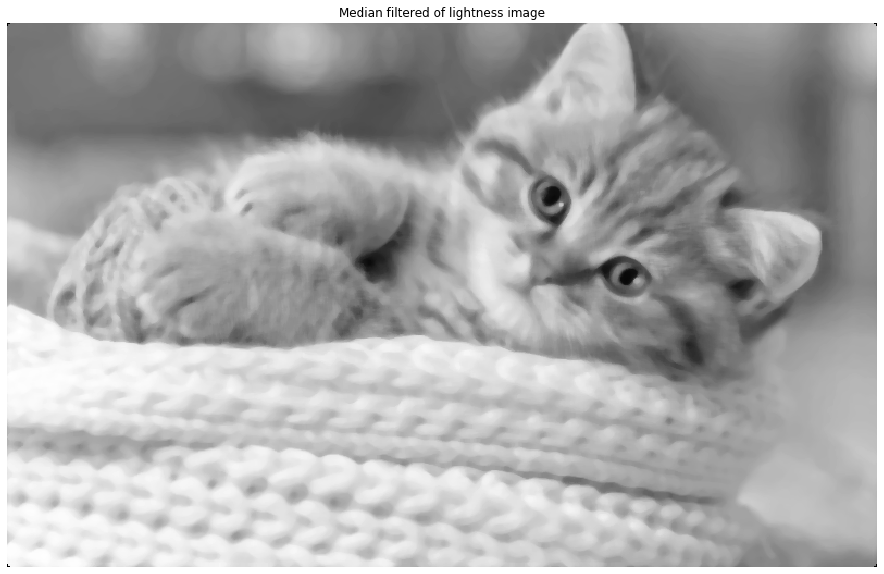

In [129]:
kernel_size = 7
img_light = signal.medfilt2d(img_light, kernel_size)
imshow(img_light,title='Median filtered of lightness image')


**Warning** For the next questions, we will compare different edge detections methods. For each method, you'll have to use the filtered lightness map from the previous question.

# Question 4

Compute and display on two adjacents graphs (subplots):
- The image of the horizontal gradient
- The image of the vertical gradient

On a third graph (new figure), display the magnitude of the gradient

> To compute the gradient, you'll have to define yourself the convolution mask. For the convolution itself,you can use the function **scipy.signal.convolve2d**:
```python
convolved = scipy.signal.convolve2d(img, mask, mode='same')
```

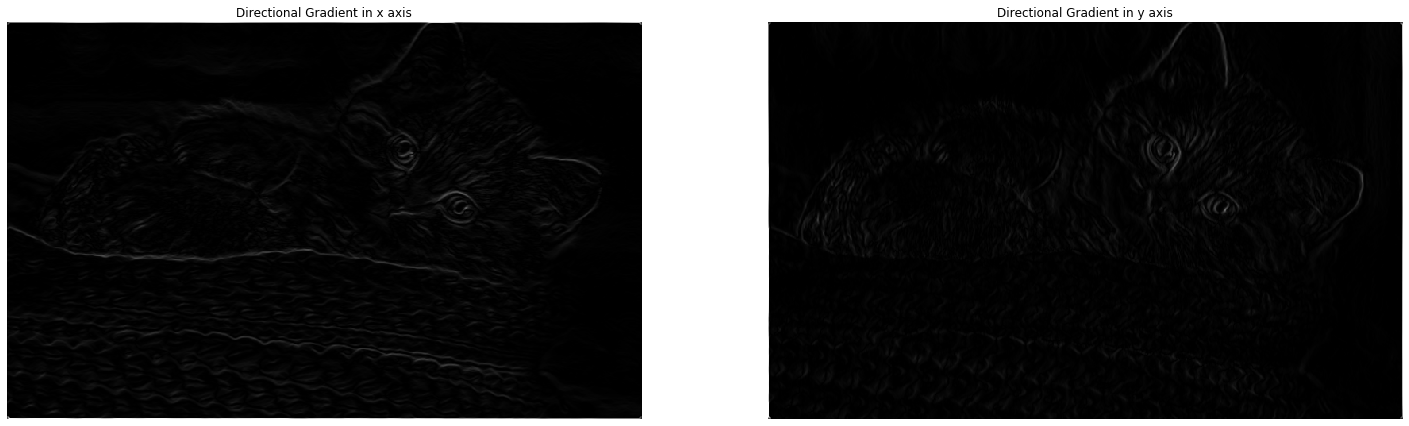

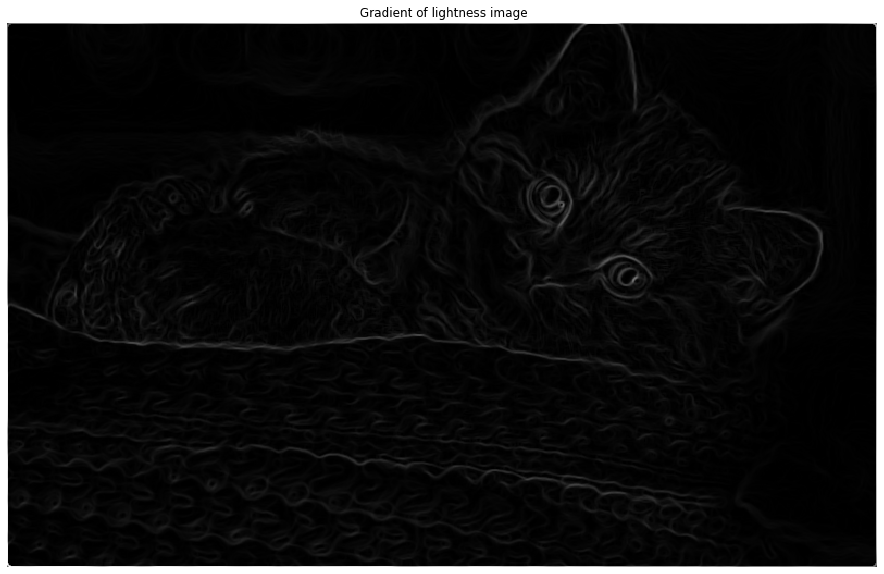

In [130]:
fig1, (ax1, ax2) = plt.subplots(1,2)
g_x = [[1. , 1. , 1.],[0 , 0 , 0],[-1., -1. , -1.]] # Using Perwitt filter
x_grad = signal.convolve2d(img_light, g_x, mode='same')
imshow(abs(x_grad),title='Directional Gradient in x axis', ax = ax1)

g_y = [[1. , 0 , -1],[1, 0 , -1.],[1, 0 , -1.]] # Using Perwitt filter
y_grad = signal.convolve2d(img_light, g_y, mode='same')
imshow(abs(y_grad),title='Directional Gradient in y axis', ax = ax2)
plt.show()

img_grad = np.sqrt(x_grad**2 + y_grad**2) # getting magnitude
imshow(img_grad,title=' Gradient of lightness image')


# Question 5

Redo the same thing, but this time by pre-filtering the input lightness with a Gaussien  filter with a standard deviation $\sigma=1$. You'll have to code yourself the gaussian mask (You can not use cv2.GaussianBlur). Justify the size of the mask (relatively to $\sigma$).
What happens when we vary $\sigma$?

> As a reminder, a  2D Gaussian is defined by 
$$G(x, y)=A e^{\frac{-(x²+y²)}{2\sigma²}}$$
where $A$ is a constant such that the area under the Gaussian is equal to 1.

<font color='blue'>
By increasing the $\sigma$ value, the gaussian filtered image gets smoother and the edge image is less noisy since the contrast between adjusted pixels are reduced.

In [131]:
def create_gauss_kernel(size=3, sigma=0.5):
    center = (size-1)/2
    kernel = np.zeros((size,size)).astype(np.float32)
    for i in range(size):
        for j in range(size):
            kernel[i,j] = np.exp(-((i-center)**2 + (j-center)**2)/(2*sigma**2))
    A = kernel.sum()
    return kernel/A

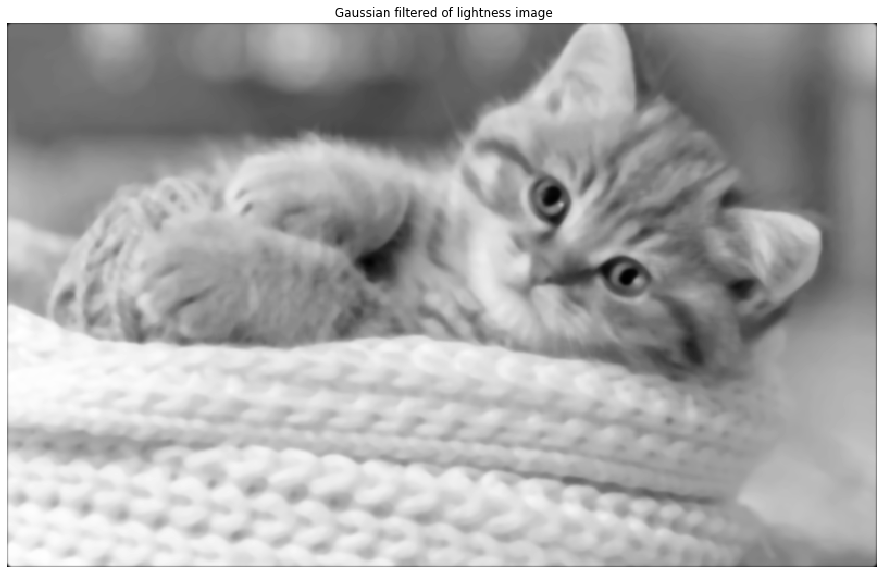

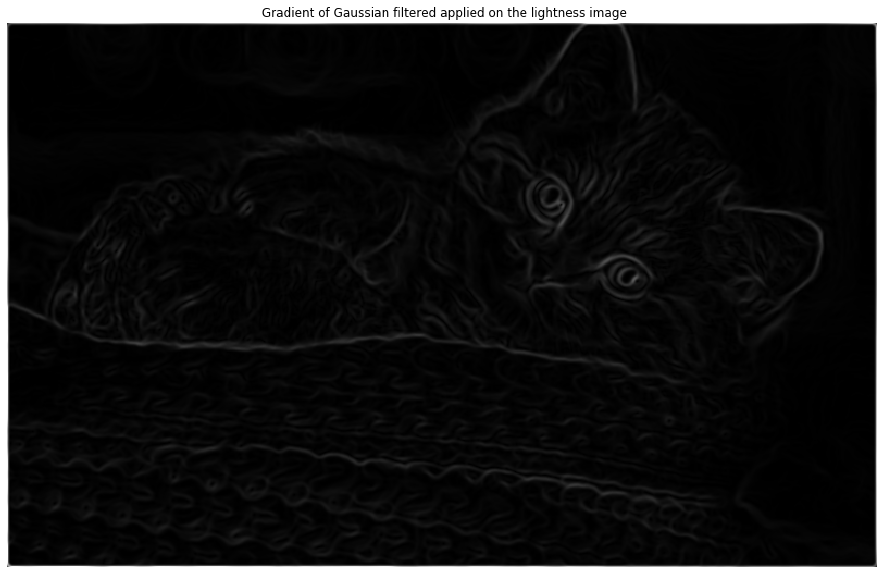

In [132]:
kernel_gauss = create_gauss_kernel(size=5, sigma=1)
img_gauss = signal.convolve2d(img_light, kernel_gauss, mode='same')

g_x = [[1. , 1. , 1.],[0 , 0 , 0],[-1., -1. , -1.]] # Using Perwitt filter
g_y = [[1. , 0 , -1],[1. , 0 , -1.],[1. , 0 , -1.]] # Using Perwitt filter
x_grad = signal.convolve2d(img_gauss, g_x, mode='same')
y_grad = signal.convolve2d(img_gauss, g_y, mode='same')
img_gauss_grad = np.sqrt(x_grad**2 + y_grad**2) # getting magnitude

#Plot
imshow(img_gauss,title=' Gaussian filtered of lightness image')
imshow(img_gauss_grad,title=' Gradient of Gaussian filtered applied on the lightness image')

# Question 6
In order to extract the edges from the magnitude image, we will use Otsu's method. You'll have to implement it.
Complete the following function:
```python
def otsu_thresholding(img):
    assert img.dtype==np.uint8, "The image image must have a uint8 type"
    thresholds = np.unique(img)
    hist, bins = np.histogram(img, np.arange(256))
    bins = bins[:-1]
    hist = hist/img.size
    nu = 0
    for k in thresholds:
        hist_c1  = hist[:k] # Histogram of cluster 1 
        hist_c2  = hist[k:] # Histogram of cluster 2
        P1_k = ... # Probability to belong to cluster 1
        P2_k = ... # To complete
        if P1_k==0:
            continue
        if P2_k==0:
            break
        m1_k =  np.sum(bins[:k]*hist_c1) / P1_k.astype(np.float32) # Mean on cluster 1
        m2_k =  ... # To complete
        var_interclasse = ... # To complete
        if var_interclasse>nu:
            threshold = k
            nu = var_interclasse
    thresholded = ... # To complete
    return thresholded
```
that takes a monochromatic image as a parameter and automatically threshold it using Otsu's method. 

> Careful, for Otsu's method, the image must be of type uint8.

Compare Otsu's thresholding on the magnitude with and without the Gaussian prefiltering. What do you observe?

In [133]:
def otsu_thresholding(img):
    assert img.dtype==np.uint8, "The image image must have a uint8 type"
    thresholds = np.unique(img)
    hist, bins = np.histogram(img, np.arange(256))
    bins = bins[:-1]
    hist = hist/img.size
    nu = 0
    for k in thresholds:
        hist_c1  = hist[:k+1] # Histogram of cluster 1 
        hist_c2  = hist[k+1:] # Histogram of cluster 2
        ####
        P1_k = hist_c1.sum()/hist.sum()# Probability to belong to cluster 1
        P2_k = hist_c2.sum()/hist.sum()# To complete
        if P1_k==0:
            continue
        if P2_k==0:
            break
        m1_k =  np.sum(bins[:k+1]*hist_c1) / P1_k.astype(np.float32) # Mean on cluster 1
        m2_k =  np.sum(bins[k+1:]*hist_c2) / P2_k.astype(np.float32) # To complete
        var_interclasse = P1_k*P2_k*(m2_k-m1_k)**2# To complete
        if var_interclasse>nu:
            threshold = k
            nu = var_interclasse
    thresholded = threshold # To complete
    return thresholded

For test:
Threshold using our function is 57.
Threshold using cv2 function is 57.


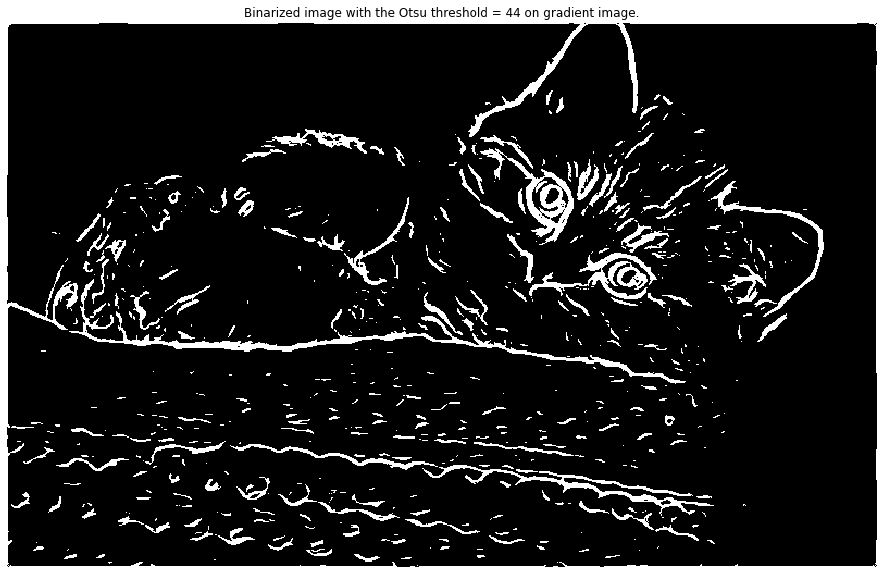

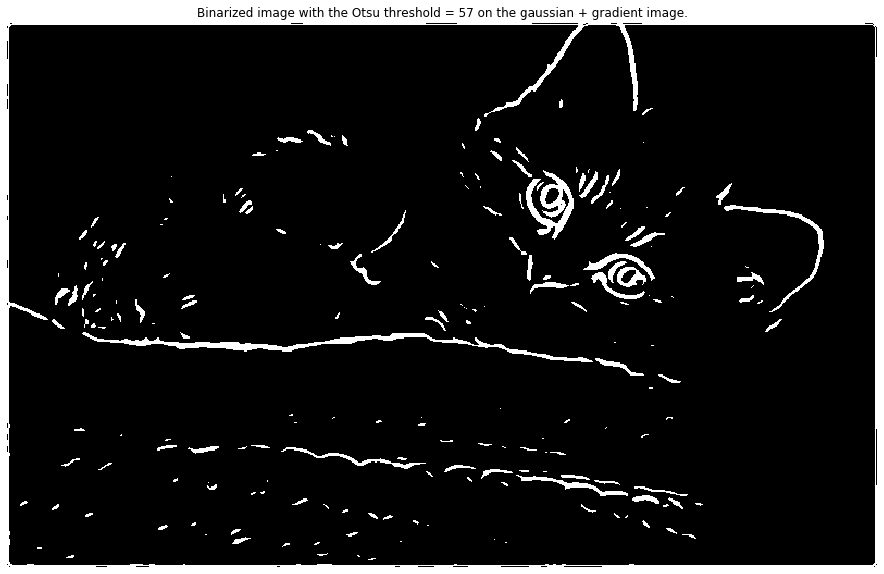

In [134]:
thr_grad=otsu_thresholding(f2int(img_grad)) # Image taken from Q4
thr_gauss_grad=otsu_thresholding(f2int(img_gauss_grad))# Image taken from Q5

img_grad_b = f2int(img_grad)>thr_grad# Binarization
img_gauss_grad_b = f2int(img_gauss_grad)>thr_gauss_grad# Binarization

### Threshold by builting command of cv2  (For test) #######
ret2,th2 = cv2.threshold(f2int(img_gauss_grad),0,255,cv2.THRESH_OTSU)
print('For test:\nThreshold using our function is %d.\nThreshold using cv2 function is %d.'%(thr_gauss_grad,ret2)  )
############################################################

# Plot
imshow(img_grad_b,title='Binarized image with the Otsu threshold = {} on gradient image.'.format(thr_grad))
imshow(img_gauss_grad_b,title='Binarized image with the Otsu threshold = {} on the gaussian + gradient image.'.format(thr_gauss_grad))


<font color='blue'>
We have changed the boundary value in calculating histogram and mean from K to K+1 since the k value should fall into the first cluster. The result is tested on cv2.threshold.

<font color='blue'>
Comparing thresholding on the magnitude with and without the Gaussian prefiltering, it is observed that the Gaussian filtered image results in less noisy edges than without the filter. Also, the binarization threshold obtained from Otsu method is higher when the Gaussian filter is applied.
   

## Question 7
Let's now try edge detection using Marr-Hildreth's approach. A quick reminder of the method:
* The image is filtered with a gaussian (parametrized by $\sigma$)
* The Laplacian is computed
* We search the locations of the zero croissing of the Laplacian. We only keep the ones with an absolute difference greather than a given threshold $t<1$


> The code  for this last step is given in the function below. It expects the Laplacian as an input as well as a treshold.


Display the edges for $\sigma=5$ and a threshold equal to 0.005. For the computation of the Laplacian, you need to create yourself the corresponding filter mask.
Test the edge detection with different values of $\sigma$ and threhsold seuil and indicate the effect of both parameters.

In [135]:
def zeros_crossing(img, threshold):
    out = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            ec = 0
            if img[i-1, j]*img[i+1, j] < 0: # y
                ec = max(ec, np.abs(img[i+1, j]-img[i-1, j]))
            if img[i, j-1]*img[i, j+1] < 0: # x
                ec = max(ec, np.abs(img[i, j+1]-img[i, j-1]))
            if img[i-1, j-1]*img[i+1, j+1] < 0: # diag
                ec = max(ec, np.abs(img[i+1, j+1]-img[i-1, j-1]))
            if img[i+1, j-1]*img[i-1, j+1] < 0: # other diag
                ec = max(ec, np.abs(img[i+1, j-1]-img[i-1, j+1]))
            
            out[i, j] = ec
    
    threshold = threshold*np.max(out)
    return out>threshold


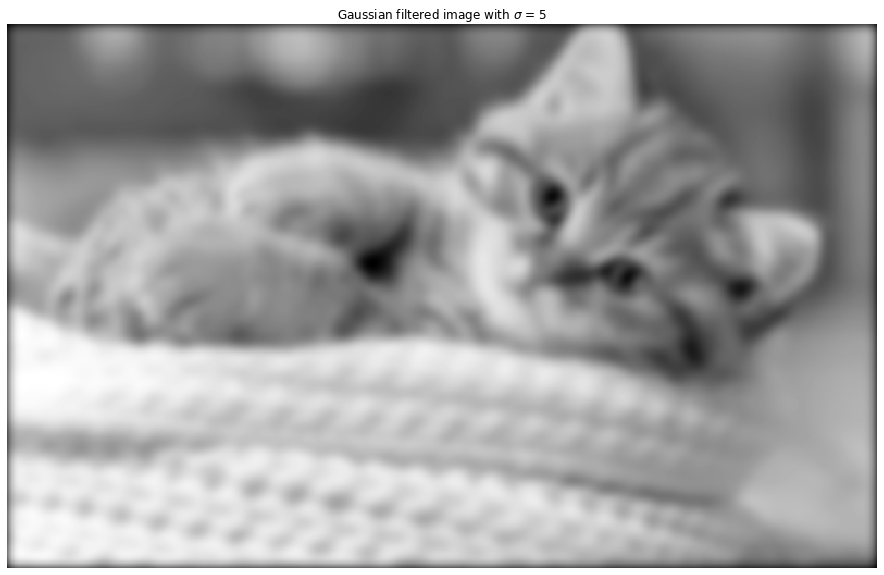

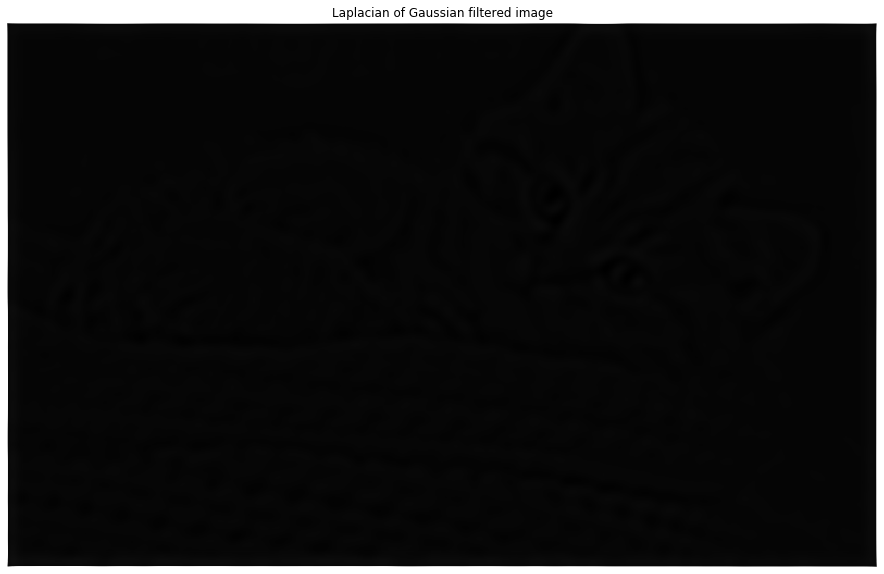

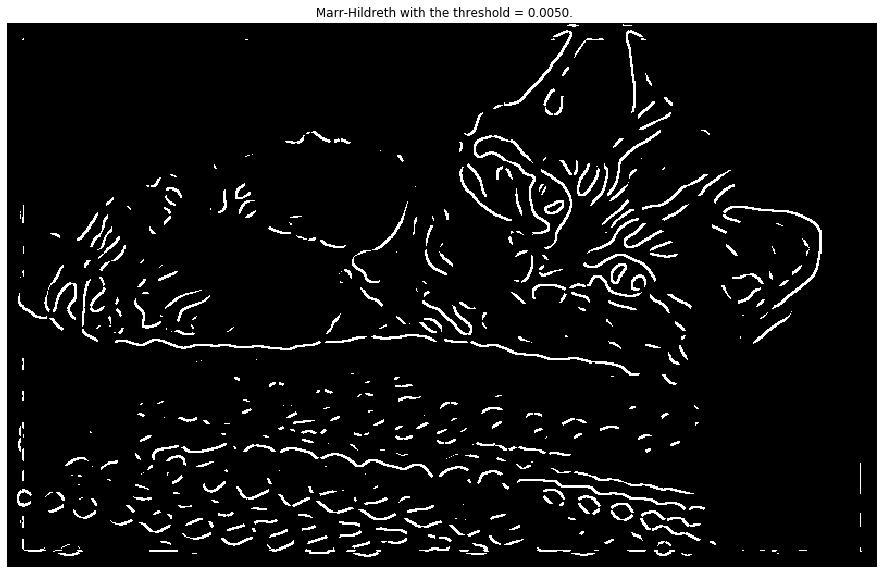

In [160]:
sigma_val = 5
kernel_gauss = create_gauss_kernel(size=6*sigma_val-1, sigma=sigma_val) # Gaussian Mask
img_gauss = signal.convolve2d(img_light, kernel_gauss, mode='same')
imshow(img_gauss, 'Gaussian filtered image with $\sigma$ = %d'%sigma_val)

mask_laplacian = np.asarray([[-1.,-1.,-1.], [-1.,8.,-1.], [-1.,-1.,-1.]])# Laplacian masks
img_gauss_laplac = signal.convolve2d(img_gauss, mask_laplacian, mode='same')
imshow(img_gauss_laplac,'Laplacian of Gaussian filtered image')

zero_thresh = 0.005
img_zero = zeros_crossing(img_gauss_laplac, zero_thresh)
imshow(img_zero,' Marr-Hildreth with the threshold = %.4f.'%zero_thresh)

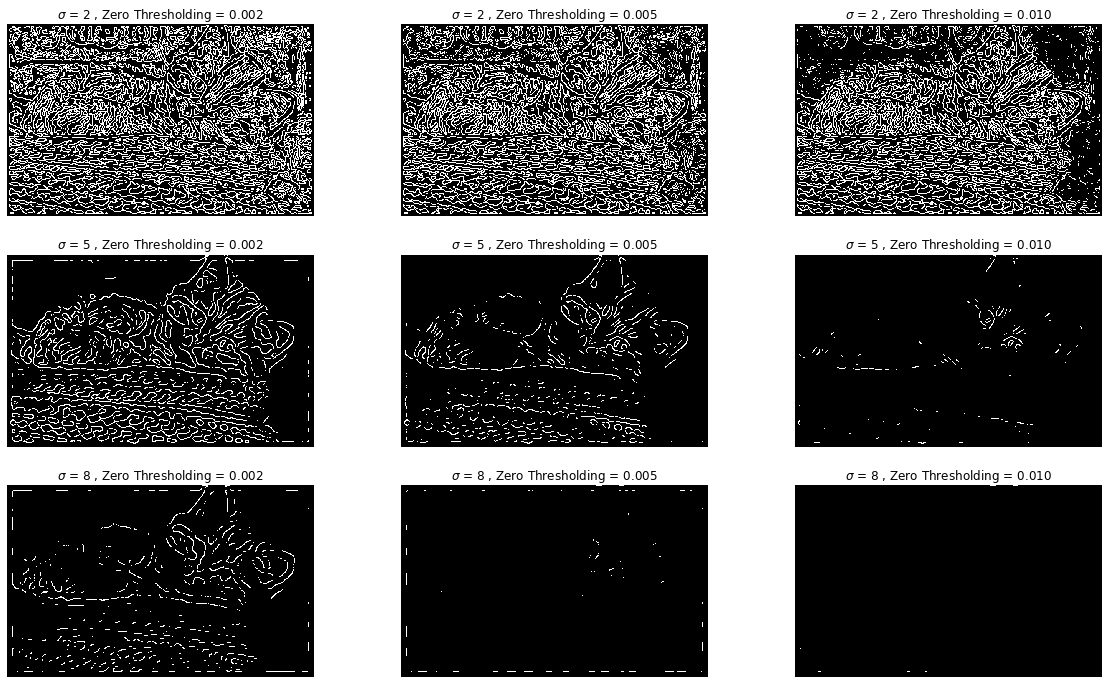

In [159]:
fig1, ((ax0, ax1, ax2), (ax3,ax4,ax5),(ax6,ax7,ax8))= plt.subplots(3,3,figsize = (20,12))

AX = [[ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8]]
SIGMA = [2, 5, 8]
THRESH = [0.002, 0.005, 0.01]
for i, sigma in enumerate(SIGMA):
    for j, thresh in enumerate(THRESH):
        kernel_gauss = create_gauss_kernel(size=6*sigma_val-1, sigma=sigma)
        img_gauss = signal.convolve2d(img_light, kernel_gauss, mode='same')
        img_gauss_laplac = signal.convolve2d(img_gauss, mask_laplacian, mode='same')
        img_zero_ = zeros_crossing(img_gauss_laplac, thresh)
        title = '$\sigma$ = %d , Zero Thresholding = %.3f'%(sigma, thresh)
        imshow(img_zero_, title = title, ax = AX[i][j])

<font color='blue'>
The above figure shows the results for different values of $\sigma$ and zero crossing threshold. By increasing the $\sigma$ value within the rows, some parts of edges are removed, and the binary edge is less noisy. Moreover, the zero-crossing threshold is increased through columns. By increasing this value, a few numbers of pixels can satisfy the threshold, then the less edges can be detected. We need to adjust the values of both $\sigma$ and zero crossing threshold to detect the edges accurately.

## Question 8

Finally, you'll try Canny's approach to edge detection. You are not asked to implement it yourself: you can use the function from **openCV** in the following way:

```python
edges_canny = cv2.Canny(clarte, min_hysteresis, max_hysteresis) # lightness must be in uint8
```
where min_hysteresis, max_hysteresis represent respectively the lower and upper hysteris thresholds.
Using a upper threshold to 100, compared the effects of differents values for the lower threshold. Discuss the results.

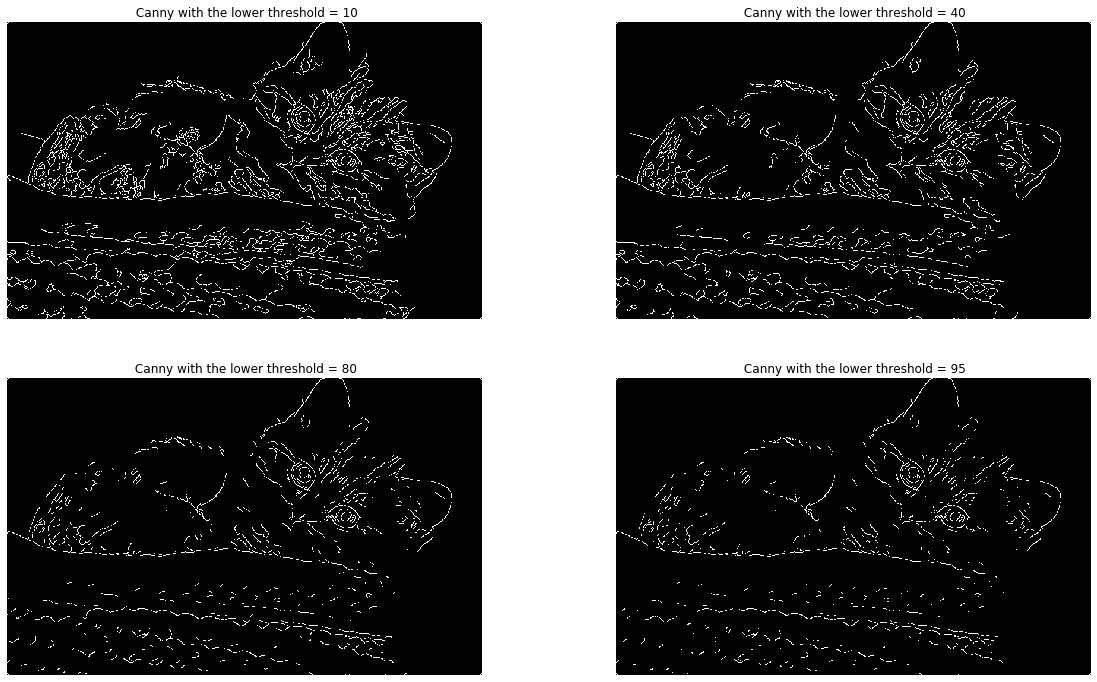

In [138]:
max_hysteresis=100
min_hysteresis=95
img_canny = cv2.Canny(f2int(img_light), min_hysteresis, max_hysteresis).astype(bool)

fig1, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(20,12))
min_hysteresis = 10
imshow(cv2.Canny(f2int(img_light), min_hysteresis, max_hysteresis).astype(bool),title=' Canny with the lower threshold = %d'%min_hysteresis,ax=ax1)
min_hysteresis = 40
imshow(cv2.Canny(f2int(img_light), min_hysteresis, max_hysteresis).astype(bool),title=' Canny with the lower threshold = %d'%min_hysteresis,ax=ax2)
min_hysteresis = 80
imshow(cv2.Canny(f2int(img_light), min_hysteresis, max_hysteresis).astype(bool),title=' Canny with the lower threshold = %d'%min_hysteresis,ax=ax3)
min_hysteresis = 95
imshow(cv2.Canny(f2int(img_light), min_hysteresis, max_hysteresis).astype(bool),title=' Canny with the lower threshold = %d'%min_hysteresis,ax=ax4)

<font color='blue'>
   Based on the Canny method, the number of connected pixels which are selected as edges decreases by increasing the value of lower threshold. 

## Question 9
Display on a 2x2 subplots the edges obtained with the 4 differents approaches. Comments the results of each method and their respective flexibility.


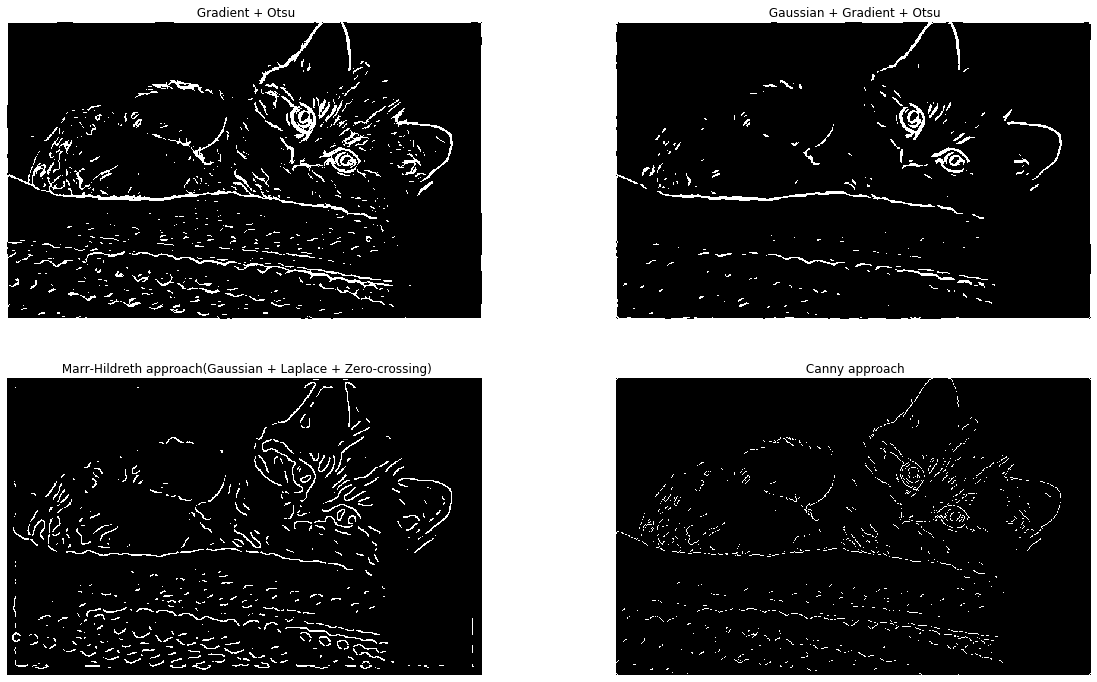

In [165]:
fig1, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(20,12))
imshow(img_grad_b,title=' Gradient + Otsu',ax=ax1)
imshow(img_gauss_grad_b,title=' Gaussian + Gradient + Otsu',ax=ax2)
imshow(img_zero,title=' Marr-Hildreth approach(Gaussian + Laplace + Zero-crossing)',ax=ax3)
imshow(img_canny,title=' Canny approach',ax=ax4)

<font color='blue'>
 By comparing these four implemented approaches, the following effects are observed: 

1- By adding the Gaussian filter to the first image $Gradient + Otsu$, the image becomes less noisy.
    
2- First three methods create thicker edges in compare to $Canny$ approach.
    
3- $Marr-Hildreth$ approach is sensitive to the zero-crossing threshold. However, $Canny$ is less sensitive to the lower threshold (high threshold fixed). We may deduce that tunning the $Canny$ parameter is easier.
    
4- $Canny$ provided the most consistent edges (It can be seen better by increasing figure size).

# Part 2

This part work on colors images. Therefore, you should start from the very first image loaded in question 1.

## Question 10
Load the image **chaton.png**, filter with a median-filter of size 9, convert it into float and display it. 

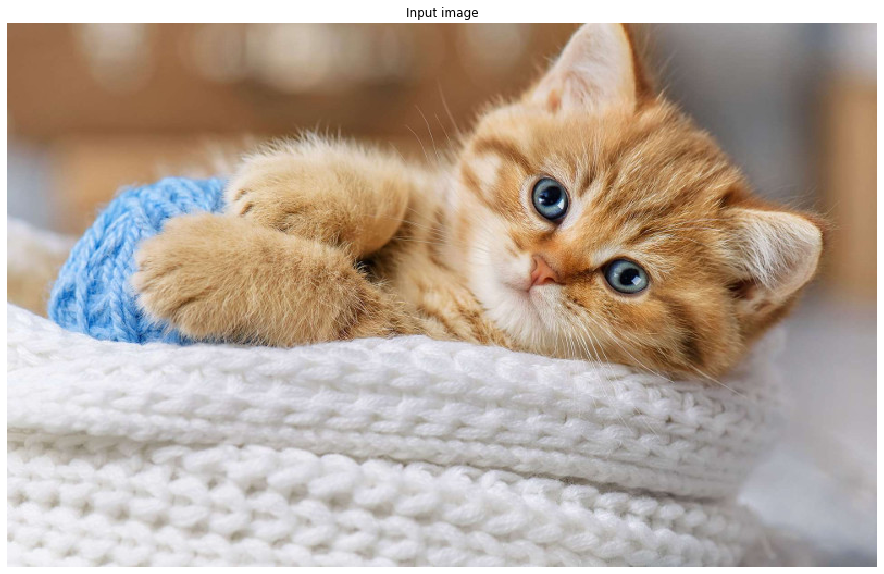

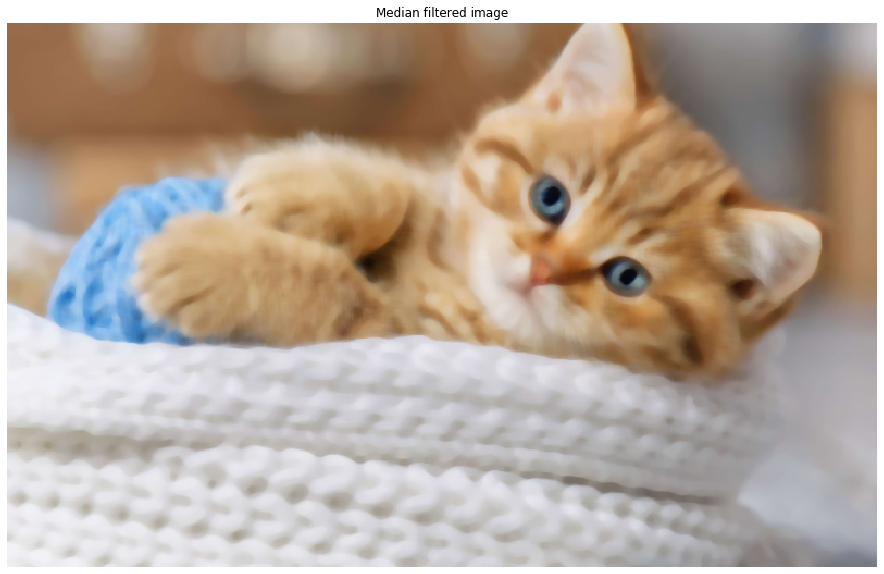

In [140]:
img = cv2.imread('chaton.png')
img_med = cv2.medianBlur(img,9)
## Plot
imshow(img,title = 'Input image', is_bgr=True)
imshow(img_med,title = 'Median filtered image', is_bgr=True)

A picture contains much more different colors than a drawing. We will therefore work on an operation called  **posterization** that consist in reducing the number of colors contained in an image. We can do so in differents ways.

### Naive posterization

In this approach, we recense all the N unique colors in the image as an array $T_1$ with shape $N\times 3$. Then we keep only the first K most represented colors such that we obtain a new array $T_2$ with shape $K \times 3$. 

For each pixel of the image, we replace the original color as its closest one in $T_2$. Proximity is defined by using the euclidean distance.



## Question 11
Implement the function
```python 
def recense_colors(img):
    ...
    return unique_colors, count 

```
That returns an array $T1$ of unique colors as well as the occurence of each one in the image.

In [141]:
def recense_colors(img):
    
    if img.ndim==3:
        unique_colors, count = np.unique(img.reshape(-1, img.shape[-1]), axis=0, return_counts=True)
    else:
        img_1_unique, count = np.unique(img, return_counts=True)
        unique_colors = img_1_unique.reshape(-1,1)
            
    ####### Another coding approach #######
    '''
    if img.ndim==3:
        R = img[:,:,0]
        G = img[:,:,1]
        B = img[:,:,2]
        img_nums = R*2**16 + G*2**8 + B # Creating a unique number for each color
    else:
        img_nums=img
        
    img_1_unique, count = np.unique(img_nums, return_counts=True) # Extracting unique colors
    if img.ndim==3:
        R_unique = (img_1_unique//(2**16)).reshape(-1, 1)
        G_unique = ((img_1_unique%(2**16))//(2**8)).reshape(-1, 1)
        B_unique = (img_1_unique%(2**8)).reshape(-1, 1)
        unique_colors=np.concatenate((R_unique, G_unique, B_unique), axis=1)
    else:
        unique_colors = img_1_unique.reshape(-1,1)
    '''
    return unique_colors, count 

## Question 12
Complete the following function
```python
def euclidean_distance(col1, col2):
    """
    This function takes two colors arrays and return the table of all the distances between them
    :param col1: Array of shape Nx3
    :param col2: Array of shape Mx3
    :return d: Array of euclidean distances of shape NxM

    """
    .....
    return d

def naive_posterization(img, K=32):
    h, w, c = img.shape
    unique_colors, counts = recense_colors(img)
    T2 = ... # To complete: we only keep the K most frequent colors
    distances = euclidean_distance(T2,  img.reshape(-1, c))
    indices_d_min = ... # For each pixels, we recover the value of the indice that will give us the new color in T2.
    posterization = ...
    return posterization.reshape(h, w, c)
    
```

In [142]:
def euclidean_distance(col1, col2):
    """
    This function takes two colors arrays and return the table of all the distances between them
    :param col1: Array of shape Nx3
    :param col2: Array of shape Mx3
    :return d: Array of euclidean distances of shape NxM

    """
    d=scipy.spatial.distance.cdist(col1,col2,'euclidean') 
    
    ########Another Method#######
    '''
    d = np.zeros((col1.shape[0],col2.shape[0]))
    for i , element in enumerate(col1):
        d[i,:] = np.sqrt(np.sum((element - col2)**2,axis =1))
    '''    
    return d


In [143]:
def naive_posterization(img, K=32):
    h, w, c = img.shape
    unique_colors, counts = recense_colors(img)
    T2 = unique_colors[np.argsort(counts)[-K:],:] # To complete: we only keep the K most frequent colors
    distances = euclidean_distance(T2,  img.reshape(-1, c))
    indices_d_min = np.argmin(distances,axis=0) # For each pixels, we recover the value of the indice that will give us the new color in T2.
    posterization = T2[indices_d_min,:]
    return posterization.reshape(h, w, c)

## Question 13
Test and display the result of the posterization with K=64. What do you deduce from the limitations of the naive posterization?

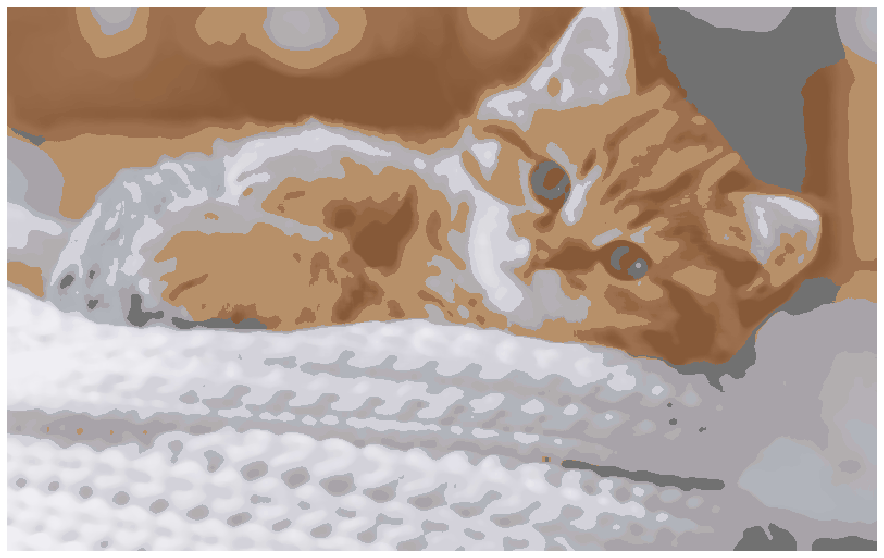

In [145]:
img_naive_poster=naive_posterization(img_med,64)
imshow(img_naive_poster, is_bgr=True)

<font color='blue'>
The naive posterization only considers the most frequent colors. Therefore, very similar colors (e.g. different brown colors) may be selected for posterization due to their frequency. However, very different color (e.g. blue) is not selected even it is an important color which specify an object (kamwa).

## Question 14
To correct the defaults from the naive posterization, we will use a more sophisticated approach to reduce the number of colors. Instead of only keeping the most frequent ones, we will regroup the colors within K clusters in a way that each cluster contains colors that are close to each others. Our new array $T2$ will be composed of the mean of each cluster. This fundamental algorithm in AI is called K-mean. 

No worries, you don't have to implement it! You can simply use the following function:
```python
from scipy.cluster.vq import kmeans
T2 = kmeans(T1, K)[0] # K is the number of colors you want to keep and T1 the array of unique colors..
```

Implement the function
```python
def posterizations_kmeans(img, K=8):
    ...
```
that uses kmeans to compute T2 and posterizes the image accordingly. Display the results for K=2,K=8 et K=64. Conclusions?

In [146]:
def posterizations_kmeans(img, K=8):    
    h, w, c = img.shape
    unique_colors, counts = recense_colors(img)
    T2 = f2int(kmeans(int2f(unique_colors), K)[0]) # Replaced with the most frequent colors
    distances = euclidean_distance(T2,  img.reshape(-1, c))
    indices_d_min = np.argmin(distances,axis=0) # For each pixels, we recover the value of the indice that will give us the new color in T2.
    posterization = T2[indices_d_min,:]
    return posterization.reshape(h, w, c)

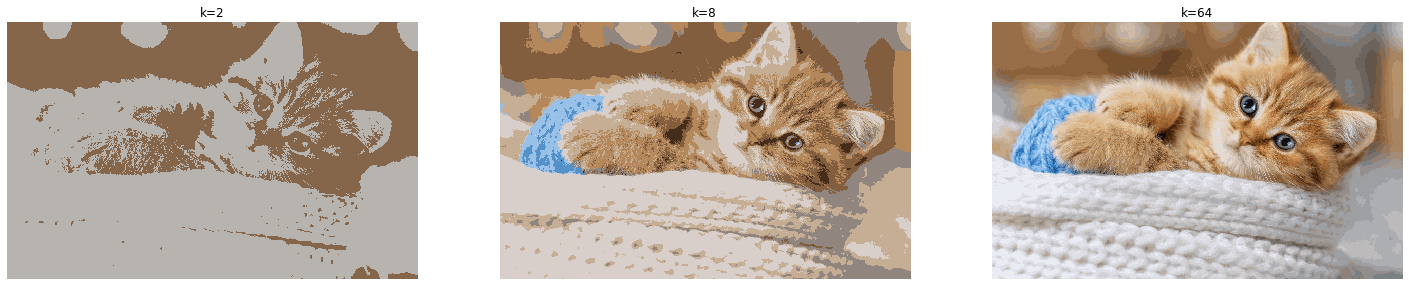

In [147]:
fig1, (ax1, ax2, ax3) = plt.subplots(1,3)
img_kmean_poster=posterizations_kmeans(img,2)
imshow(img_kmean_poster,"k=2",is_bgr=True,ax=ax1)

img_kmean_poster=posterizations_kmeans(img,8)
imshow(img_kmean_poster,"k=8",is_bgr=True,ax=ax2)

img_kmean_poster=posterizations_kmeans(img,64)
imshow(img_kmean_poster,"k=64",is_bgr=True,ax=ax3)

<font color='blue'>
    Since kmeans clusters the colors based on the inter- and intra- class differences, the selected colors can provide the better representative of the main image. By increasing k value, the posterized image gets closer to the main image.

## Question 15

In the previous two cases, we have posterized the image globally without considering the fact that some colors are more important than others. Nonetheless, on a drawing, there are much more different hues than saturations or values (if you take a pencil box, you usually have about ten different hues but barely  two or three saturation/values per hue). 

Let's mimic this by posterizing our channels independantly. Taking inspiration from previous questions, implement the function:
```python
def posterize_grayscale(canal, K=8):
    ...
```
that posterizes a single channel using k_means approach.



In [148]:
def posterize_grayscale(canal, K=8):  
    h, w = canal.shape
    unique_colors, counts = recense_colors(canal)
    T2 = f2int(kmeans(int2f(unique_colors), K)[0])
    distances = euclidean_distance(T2,canal.reshape(-1, 1))
    indices_d_min = np.argmin(distances,axis=0) # For each pixels, we recover the value of the indice that will give us the new color in T2.
    posterization = T2[indices_d_min,:]
    return posterization.reshape(h, w)

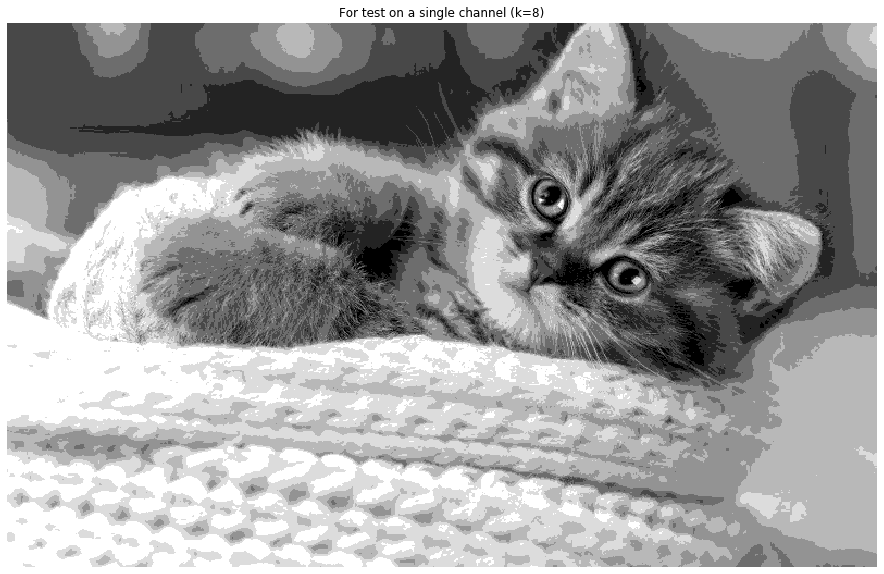

In [167]:
# For testing the function, the B channel is posterized
img_gray=cv2.imread('chaton.png')
img_gray = img_gray[:,:,0]
h,w = img_gray.shape
img_kmean_poster=posterize_grayscale(img_gray,8)
imshow(img_kmean_poster,"For test on a single channel (k=8)")

## Question 16
For now, we will use a color space very similar to the HSI (seen in class) which is the HSV (Hue/Saturation/Value). 
To convert a RGB into HSV et reciprocally, use the following functions:
```python
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

```
Display separately the three channels H, S and V and comment the results. In which range are each channel?

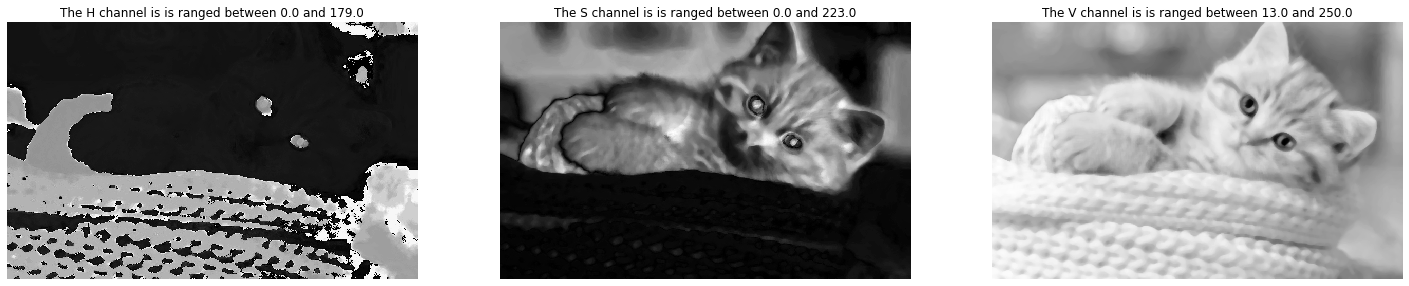

In [150]:
img_hsv = cv2.cvtColor(img_med, cv2.COLOR_BGR2HSV)

fig1, (ax1, ax2, ax3) = plt.subplots(1,3)

h = img_hsv[:,:,0]
h.max()
title_h = "The H channel is is ranged between %.1f and %.1f"%(h.min(),h.max())
s = img_hsv[:,:,1]
title_s = "The S channel is is ranged between %.1f and %.1f"%(s.min(),s.max())
v = img_hsv[:,:,2]
title_v = "The V channel is is ranged between %.1f and %.1f"%(v.min(),v.max())

imshow(h,title=title_h, ax=ax1)
imshow(s,title=title_s, ax=ax2)
imshow(v,title=title_v, ax=ax3)

<font color='blue'>
   The $H$ channel shows the colors while $S$ and $V$ add saturation and value to each color. The variation of pixel values in the $H$ channel is more in compare with the $S$ and $V$ channels (most black or most white).
    Generally, the range of $H$ value is between 0 and 180 while $S$ and $V$ have the pixels between 0 and 255. The specific ranges of the channels are written on the title of each sub-figure.

## Question 17
Posterize each channel independantly such that:
- Hue contains 8 differents elements
- Saturation only 3
- Value only 3

Then reconstruct the image in the RGB color space (display it).

What is the thoerical maximum RGB colors that the image can contain under those constraints? And in practise, how many colors are there after this posterization?

<font color='blue'>
  Theoretically, $8\times3\times3=72$ different colors can be produced based on the posterization levels of each channel. However, there are 48 unique colors in the posterized image (acquired from the $recense\_colors$ function). 

The number of unique colors in the posterized image is 50


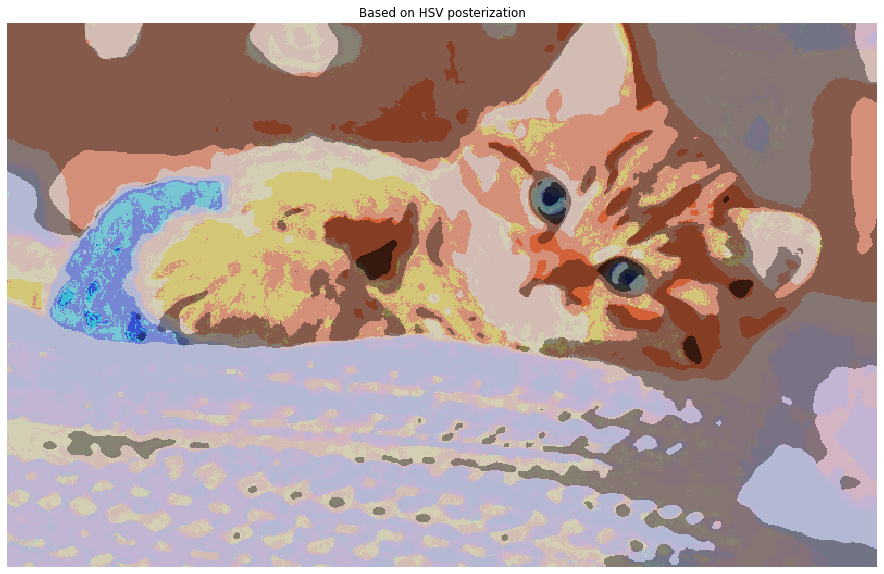

In [169]:
hh, ww, cc = img_hsv.shape

h = img_hsv[:,:,0]
h_post = posterize_grayscale(h,K=8).reshape(hh, ww, 1) # reshaped to be able to be concatenated to creat image

s = img_hsv[:,:,1]
s_post = posterize_grayscale(s,K=3).reshape(hh, ww, 1)

v = img_hsv[:,:,2]
v_post = posterize_grayscale(v,K=3).reshape(hh, ww, 1)


img_hsv_post = np.concatenate((h_post,s_post,v_post),axis=2)
img_rgb_post = cv2.cvtColor(img_hsv_post,cv2.COLOR_HSV2BGR)

num_of_color = recense_colors(img_rgb_post)[0].shape[0]
print("The number of unique colors in the posterized image is %d"%num_of_color)

imshow(img_rgb_post,title="Based on HSV posterization", is_bgr=True)


## Question 18
Let's finish our drawing by adding edges! We will use the ones obtained in the first part.

> To do so, you have many options: indexation (set to 0 the colors of the images in the edges), piecewise multiplication, bitwise_xor... You're free to chose the approach you like the most!


Create four subplots and display the differents edges (gradients, canny, LoG...) in back noir on top of the posterized image from previous question.
Which one seems the most convincing for our application?

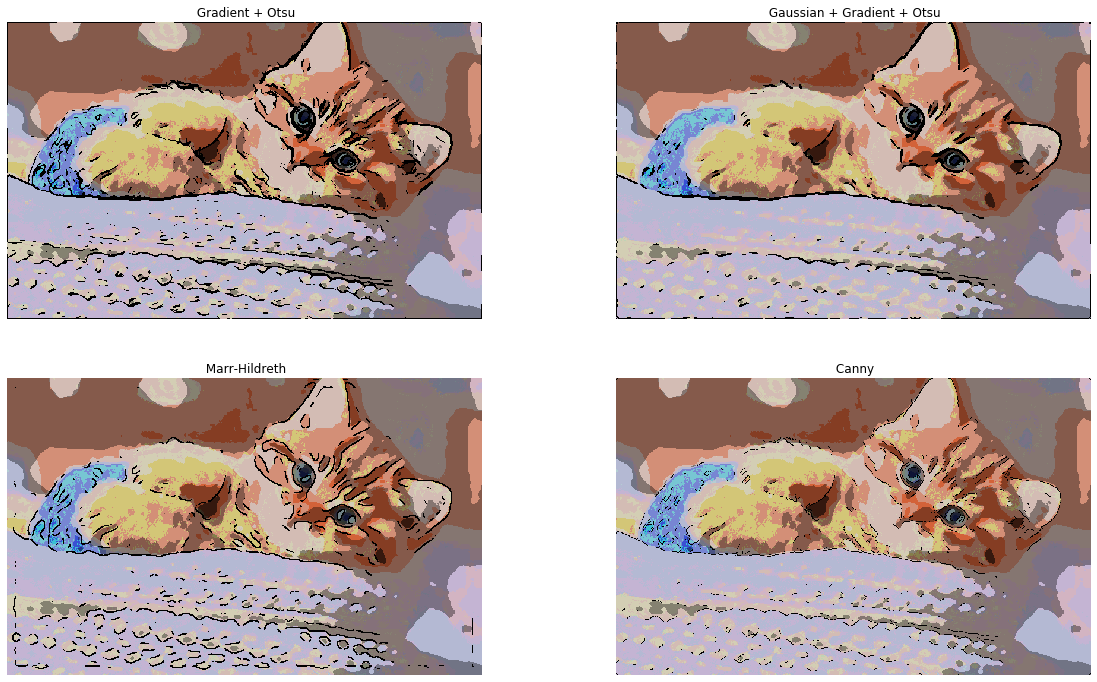

In [171]:
fig1, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(20,12))

img_rgb_post_grad = img_rgb_post*1
img_rgb_post_gauss_grad = img_rgb_post*1
img_rgb_post_Marr = img_rgb_post*1
img_rgb_post_canny = img_rgb_post*1

img_rgb_post_grad[img_grad_b,:]=0
imshow(img_rgb_post_grad,title=' Gradient + Otsu', is_bgr=True, ax = ax1)

img_rgb_post_gauss_grad[img_gauss_grad_b,:]=0
imshow(img_rgb_post_gauss_grad,title=' Gaussian + Gradient + Otsu', is_bgr=True, ax=ax2)

img_rgb_post_Marr[img_zero,:]=0
imshow(img_rgb_post_Marr,title=' Marr-Hildreth', is_bgr=True, ax = ax3)

img_rgb_post_canny[img_canny,:]=0
imshow(img_rgb_post_canny,title=' Canny', is_bgr=True, ax = ax4)


<font color='blue'>
    In this step, it seems that $Gaussian + Gradient + Otsu$ approach can detect the cat edges without highlighting unnecessary contours. Therefore, based on our opinion, although the method is not the most sophisticated one, but create the most convincing image. Moreover, by further processing, Canny approach seems to provide the most appropriate output since it gives consistent and thin edges.

## Question 19
In reality, most lines of a drawing are rarely perfectly black; their colors may depend of their widths and the colors of the object they delimit.
By taking in account these two considerations, propose a way to improve our drawing effect. You can combine as you want any of our previously obtained results.

<font color='blue'>
    The first problem is the thickness of the extracted edges during our edge detection algorithm. To have thinner edges, the morphological operation erosion (or opening) applied on the binary edge image can be an option. To apply another improvement, some other modifications (a combination of morphological operations) to remove the spur pixels remained from previous thinning operation.

The second problem is unrealistic black edges. To deal with this issue, first one can mask the binary image with the original one to transfer the local specific colors from background to the edges, then a colored edge image is obtained. It should be highlighted in the main image by adding these two images together


# Question bonus

We provide an extension of the last image, on which we add a final effect. Load the image **dessin_chaton.png** and display it.
Can you identify the effect added? Propose (and test) a simple way to reproduce it. 